IMPORTS

In [2]:
import re
import pickle
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score,fbeta_score,mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score,f1_score,fbeta_score,classification_report
from sklearn.linear_model import LogisticRegression

DATASET ENCODING

In [3]:
def encoding(value):
    if value != '0':
        return 1
    else:
        return 0
    
df=pd.read_csv('Feature_Extracted_Dataset-2.csv')
droplist= ['Sr. No.','Domain Name','Hyphenstring','Homoglyph','Vowel string','Bitsquatting','Insertion string','Omission','Repeatition','Replacement','Subdomain','Transposition','Addition string']
df = df.drop(columns=droplist)

#change boolean features into numeric features
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

#change string features into numeric features
df['TLD'] = df['TLD'].apply(encoding)
df['IP Address'] = df['IP Address'].apply(encoding)
df['ASN Number'] = df['ASN Number'].apply(encoding)
df['ASN Country Code'] = df['ASN Country Code'].apply(encoding)
df['ASN CIDR'] = df['ASN CIDR'].apply(encoding)
df['ASN Postal Code'] = df['ASN Postal Code'].apply(encoding)
df['ASN creation date'] = df['ASN creation date'].apply(encoding)
df['ASN updation date'] = df['ASN updation date'].apply(encoding)
X = df.loc[:,df.columns!="Label"]
y = df["Label"]

C:\Users\rohan\AppData\Local\Temp\ipykernel_14664\1254485183.py:12: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


BEST FEATURES OF RANDOM FOREST

Best parameters: {'max_depth': 10, 'max_features': 7, 'min_samples_leaf': 7, 'min_samples_split': 5, 'n_estimators': 50}


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

gbc_clf2 = RandomForestClassifier(max_depth = 10,
                                  max_features = 7,
                                  min_samples_leaf = 7,
                                  min_samples_split = 5,
                                  n_estimators=50,
                                  random_state=42)

gbc_clf2.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features=7, min_samples_leaf=7,
                       min_samples_split=5, n_estimators=50, random_state=42)

PERFORMANCE EVALUATION OF RANDOM FOREST

-------------------------------------Metrics------------------------------------------
Test accuracy score 98.0000
Test Recall 96.6667
Test Precision 99.3151
Test F1 Score 97.9730
Test F2 Score 97.1850
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 0.9667
TNR 0.9933
FPR 0.0067
FNR 0.0333
[[149   1]
 [  5 145]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       150
           1       0.99      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



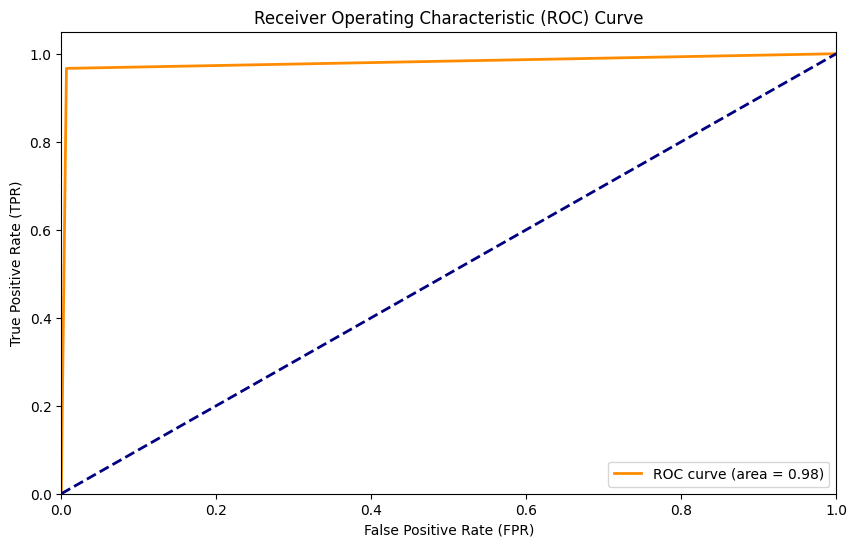

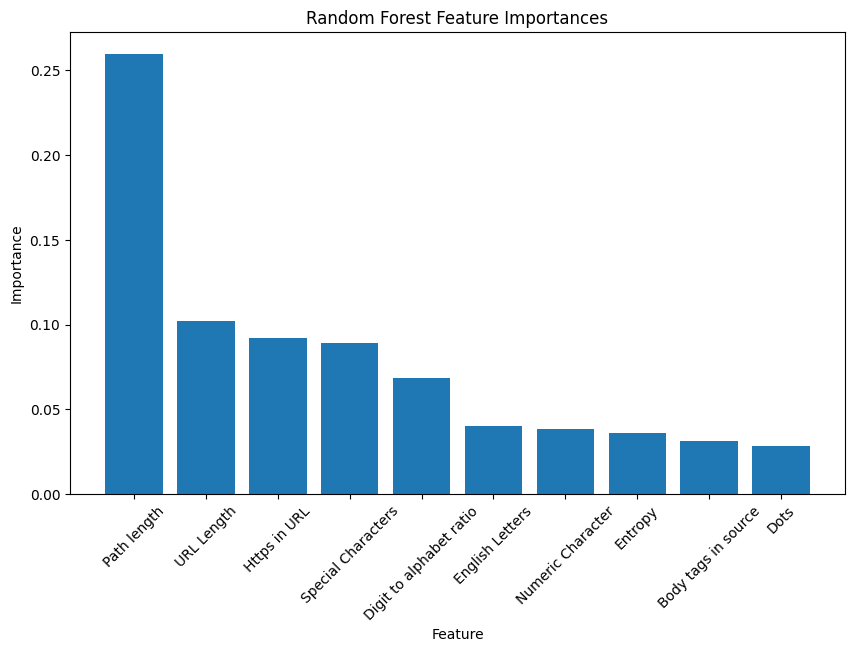

In [5]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

feature_importances = gbc_clf2.feature_importances_
feature_names = X.columns  
# Sort the features based on their importance
indices = np.argsort(feature_importances)[::-1]
# Select the top 10 features
top_n = 10
top_indices = indices[:top_n]
# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[top_indices], align="center")
plt.xticks(range(top_n), feature_names[top_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importances")
plt.show()

BEST FEATURES OF ADABOOST

Best parameters: {'algorithm': 'SAMME', 'estimator__max_depth': 10, 'estimator__max_features': 10, 'learning_rate': 0.1, 'n_estimators': 5}


In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

base_classifier = DecisionTreeClassifier(max_depth=10,
                                         max_features=10,
                                         random_state=42)

gbc_clf2 = AdaBoostClassifier(base_classifier, 
                              algorithm='SAMME',
                              learning_rate=0.1,
                              n_estimators=5,
                              random_state=42)

gbc_clf2.fit(X_train, y_train)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=10,
                                                    max_features=10,
                                                    random_state=42),
                   learning_rate=0.1, n_estimators=5, random_state=42)

PERFORMANCE EVALUATION OF ADABOOST

-------------------------------------Metrics------------------------------------------
Test accuracy score 97.6667
Test Recall 99.3333
Test Precision 96.1290
Test F1 Score 97.7049
Test F2 Score 98.6755
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 0.9933
TNR 0.9600
FPR 0.0400
FNR 0.0067
[[144   6]
 [  1 149]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       150
           1       0.96      0.99      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



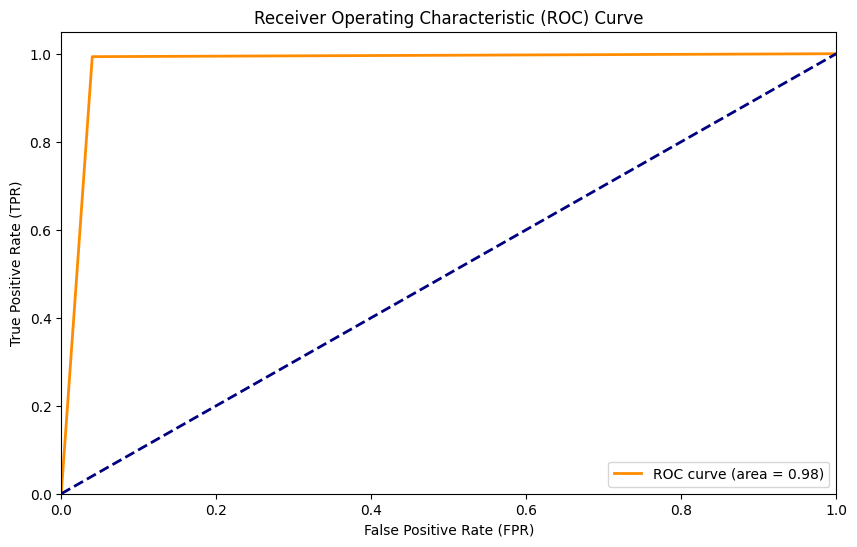

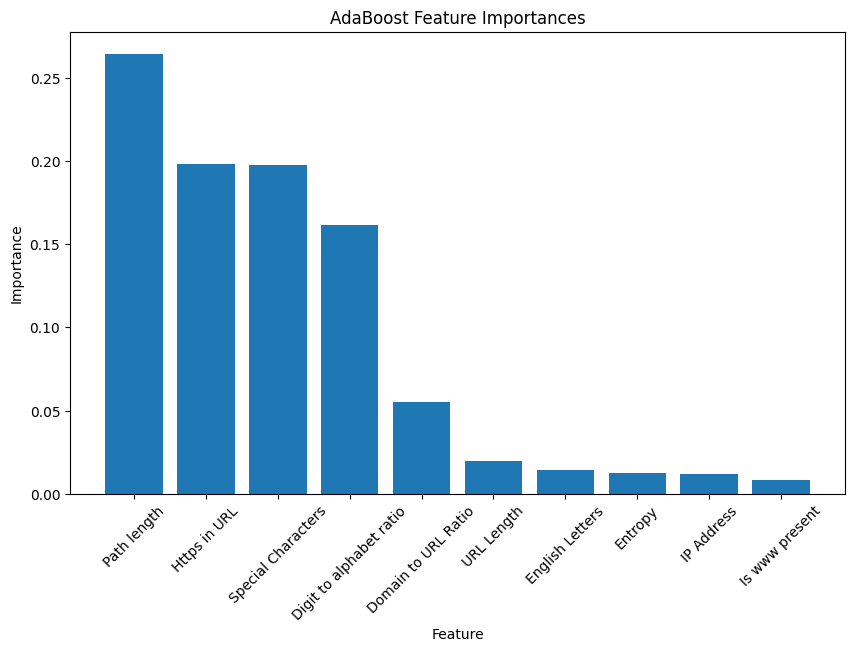

In [7]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

feature_importances = gbc_clf2.feature_importances_
feature_names = X.columns  
# Sort the features based on their importance
indices = np.argsort(feature_importances)[::-1]
# Select the top 10 features
top_n = 10
top_indices = indices[:top_n]
# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[top_indices], align="center")
plt.xticks(range(top_n), feature_names[top_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("AdaBoost Feature Importances")
plt.show()

BEST FEATURES OF GRADIENTBOOST

Best parameters: {'criterion': 'friedman_mse', 'learning_rate': 0.01, 'loss': 'exponential', 'max_depth': 50, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 30, 'subsample': 0.6}


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

gbc_clf2 = GradientBoostingClassifier(criterion='friedman_mse',
                                      learning_rate=0.01, 
                                      loss='exponential',
                                      max_depth=50,
                                      max_features='log2',
                                      min_samples_leaf=5,
                                      min_samples_split=2,
                                      n_estimators=30,
                                      subsample=0.6,
                                      random_state=42)

gbc_clf2.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, loss='exponential', max_depth=50,
                           max_features='log2', min_samples_leaf=5,
                           n_estimators=30, random_state=42, subsample=0.6)

PERFORMANCE EVALUATION OF GRADIENTBOOST

-------------------------------------Metrics------------------------------------------
Test accuracy score 97.3333
Test Recall 96.0000
Test Precision 98.6301
Test F1 Score 97.2973
Test F2 Score 96.5147
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 0.9600
TNR 0.9867
FPR 0.0133
FNR 0.0400
[[148   2]
 [  6 144]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       150
           1       0.99      0.96      0.97       150

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



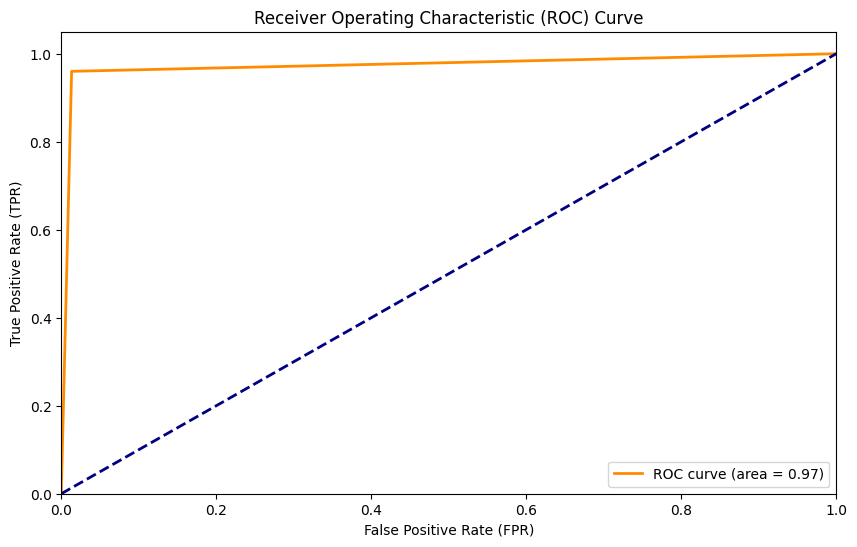

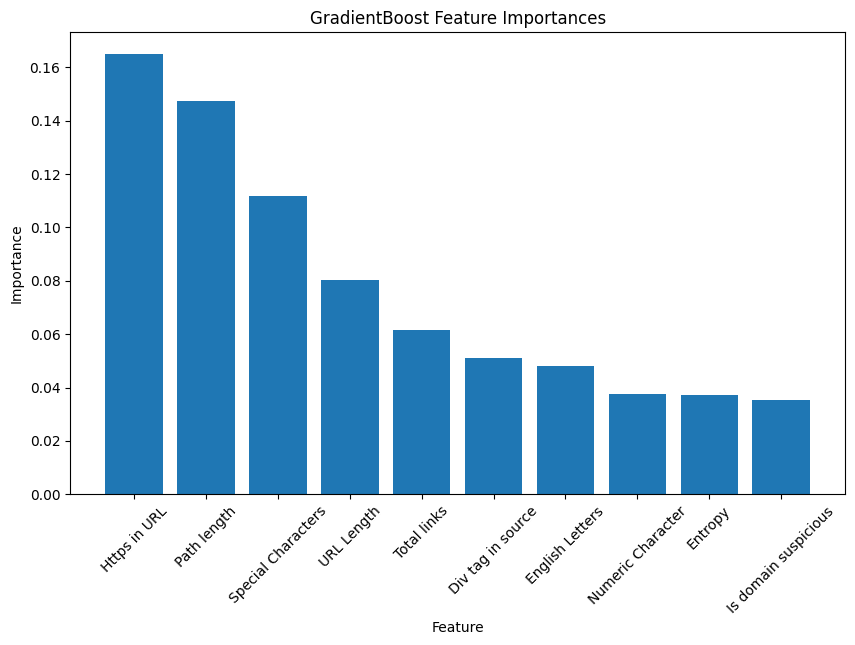

In [9]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

feature_importances = gbc_clf2.feature_importances_
feature_names = X.columns  
# Sort the features based on their importance
indices = np.argsort(feature_importances)[::-1]
# Select the top 10 features
top_n = 10
top_indices = indices[:top_n]
# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[top_indices], align="center")
plt.xticks(range(top_n), feature_names[top_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("GradientBoost Feature Importances")
plt.show()

BEST FEATURES OF XGBOOST

Best parameters: {'colsample_bytree': 0.4, 'gamma': 0.8, 'learning_rate': 0.6, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 10, 'objective': 'binary:logistic', 'subsample': 0.7}


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state =42)

gbc_clf2 = xgb.XGBClassifier(colsample_bytree= 0.4,
                             gamma= 0.8,
                             learning_rate= 0.6,
                             max_depth= 5,
                             min_child_weight= 4,
                             n_estimators= 10,
                             objective= 'binary:logistic',
                             subsample= 0.7,
                             random_state=42)

gbc_clf2.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

PERFORMANCE EVALUATION OF XGBOOST

-------------------------------------Metrics------------------------------------------
Test accuracy score 98.3333
Test Recall 96.6667
Test Precision 100.0000
Test F1 Score 98.3051
Test F2 Score 97.3154
--------------------------TPR, TNR, FPR, FNR------------------------------------------
TPR 0.9667
TNR 1.0000
FPR 0.0000
FNR 0.0333
[[150   0]
 [  5 145]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       150
           1       1.00      0.97      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



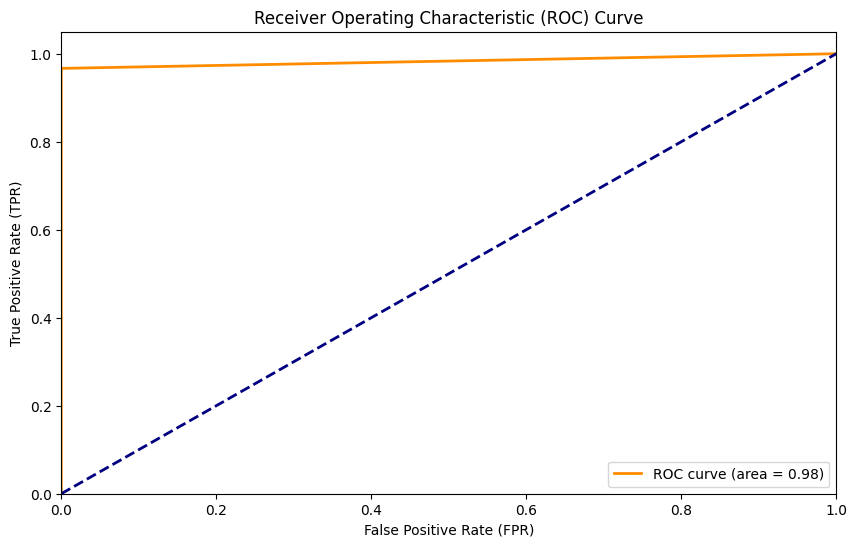

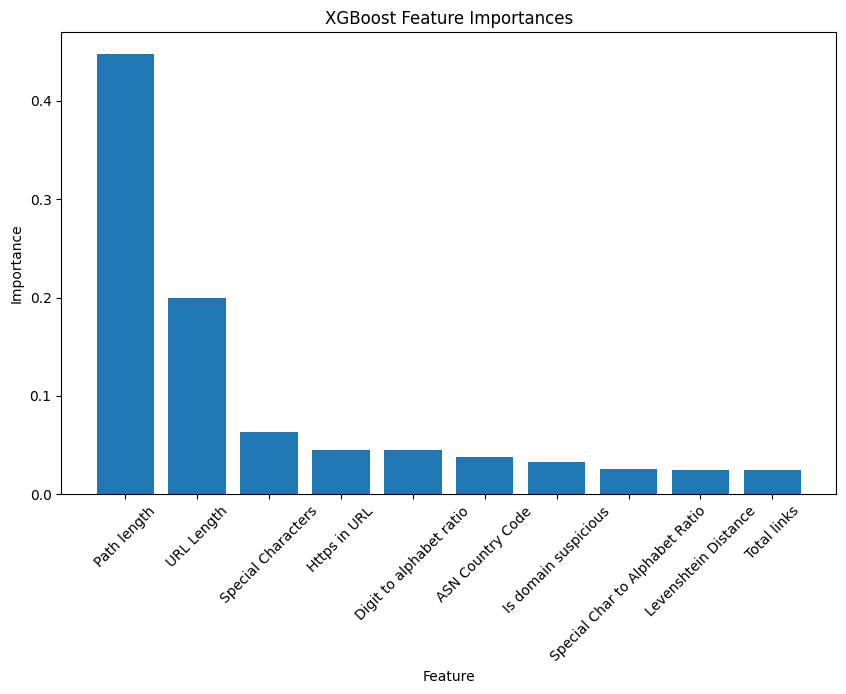

In [11]:
y_train_pred = gbc_clf2.predict(X_train)
y_test_pred = gbc_clf2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

print("-------------------------------------Metrics------------------------------------------")
print("Test accuracy score {:.4f}".format(accuracy_score(y_test, y_test_pred) * 100))
print("Test Recall {:.4f}".format(recall_score(y_test, y_test_pred) * 100))
print("Test Precision {:.4f}".format(precision_score(y_test, y_test_pred) * 100))
print("Test F1 Score {:.4f}".format(f1_score(y_test, y_test_pred) * 100))
print("Test F2 Score {:.4f}".format(fbeta_score(y_test, y_test_pred, beta=2.0) * 100))

print("--------------------------TPR, TNR, FPR, FNR------------------------------------------")
TPR = tp / (tp + fn)
TNR = tn / (tn + fp)
FPR = fp / (fp + tn)
FNR = fn / (fn + tp)
print("TPR {:.4f}".format(TPR))
print("TNR {:.4f}".format(TNR))
print("FPR {:.4f}".format(FPR))
print("FNR {:.4f}".format(FNR))
print(confusion_matrix(y_test,y_test_pred))
report = classification_report(y_test, y_test_pred)
print(report)
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

feature_importances = gbc_clf2.feature_importances_
feature_names = X.columns  
# Sort the features based on their importance
indices = np.argsort(feature_importances)[::-1]
# Select the top 10 features
top_n = 10
top_indices = indices[:top_n]
# Plot the feature importances for the top 10 features
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importances[top_indices], align="center")
plt.xticks(range(top_n), feature_names[top_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("XGBoost Feature Importances")
plt.show()